# SOM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

df = pd.read_csv('Credit_Card_Applications.csv')
df.head(5)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

##  Build the SOM

In [30]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5, random_seed = 0)
som.random_weights_init(X)
som.train_random(X, num_iteration = 100)

## Visualize results

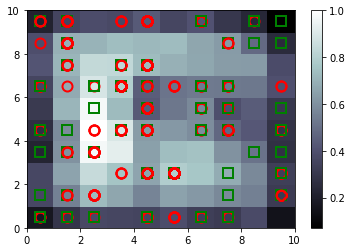

In [31]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's'] #red circles means customers who didn't get card approval and green squares those who got the approval
colors = ['red', 'green']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, 
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2
         ) 
show()

## Find the frauds

In [39]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(2,3)], mappings[(2,4)], mappings[(2,5)], mappings[(3,4)]), axis = 0)
frauds = sc.inverse_transform(frauds) 

frauds_customer_id = frauds[:,0]
print(frauds_customer_id)

[15719940. 15761158. 15711742. 15761733. 15770995. 15666166. 15605872.
 15736399. 15766734. 15667934. 15665087. 15782159. 15705379. 15749964.
 15811742. 15646190. 15681509. 15762799. 15788224. 15716347. 15686913.
 15620832. 15796413. 15776921.]


Not all customers (represented by their id) among those who got card approval (green square) are cheaters.  
However, they are more likely to have cheated, indeed they got the highest MID (Maximum Inter-node neighborhood Distance) according to the ranking.  
Therefore the Bank should investigate their case deeper.